In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
#from sklearn.datasets import load_iris

In [2]:
#Importing libraries
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)


In [3]:
!pip install missingno

In [4]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape


(891, 12)

# Exploratory Data analysis

**Variable      description**
 
survival ------- Survival               (0 = No,  1= Yes)

pclass --------- Ticket class           (1 = 1st,  2 = 2nd,  3 = 3rd) 

sex ------------- Sex 

Age ------------- Age in years 

sibsp------------- Number of siblings

parch ------------ Number of parents

ticket ------------ Ticket number 

fare ------------- Passenger fare 

cabin ------------- cabin Number

embarked ----------- Port of embarkation   C = Chebourg,  Q = Queentown,  S = Southampton 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It looks like we don't know the age of 177 passengers, nor whether 2 of them even embarked.

Cabin information for a whopping 687 persons is also missing.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


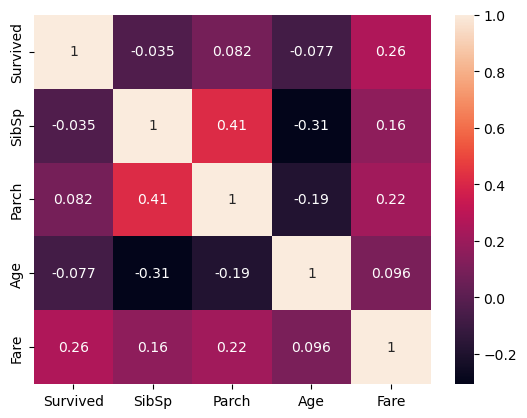

In [9]:
corr_heatmap = sns.heatmap(df[['Survived','SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True)
corr_heatmap;

**Visualizing Missing data**

<AxesSubplot:>

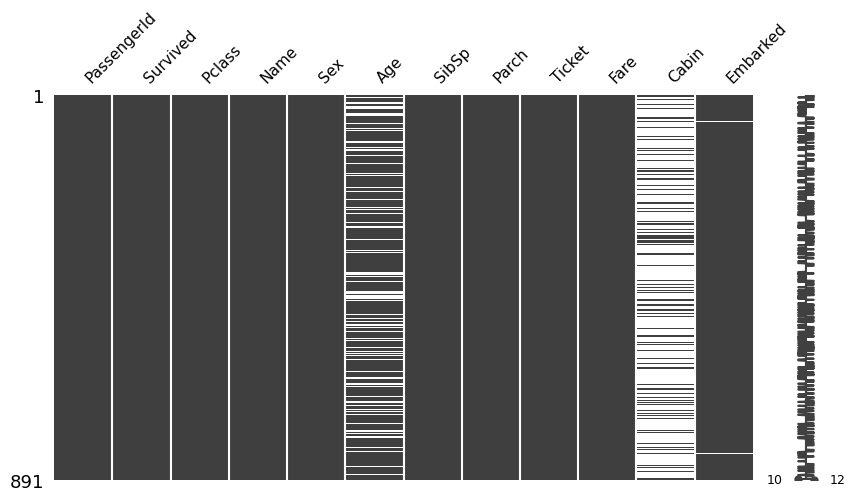

In [10]:
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(df, figsize=(10,5), fontsize=11)

**Identifying Individual Passengers with Missing Information.**

In [11]:
# Select Passengers with unknown age
# Notice how we use .isnull() rows with no value
unknown_age = df[df["Age"].isnull()]

# Print only the colums we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


In [12]:
len(unknown_age)

177

In [13]:
# Find those missing age or cabin information
missing_age = df["Age"].isnull()
missing_cabin = df["Cabin"].isnull()

# Find those missing both
unknown_age_and_cabin = df[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))

Number of passengers missing age and cabin information: 158


In [14]:
# Fill the missing values in the age column with the mean
mean_Age = df['Age'].mean()
mean_Age

29.69911764705882

In [15]:
# Fill the missing values in the age column with the mean
df['Age'] = df['Age'].fillna(mean_Age)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# fill the Cabin column with the mode
embarked_mode = df['Embarked'].mode()
embarked_mode

0    S
dtype: object

In [18]:
df['Embarked'] = df['Embarked'].fillna(embarked_mode[0])

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### sibsp- Number of siblings/spouses aboard the Titaniic

In [20]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

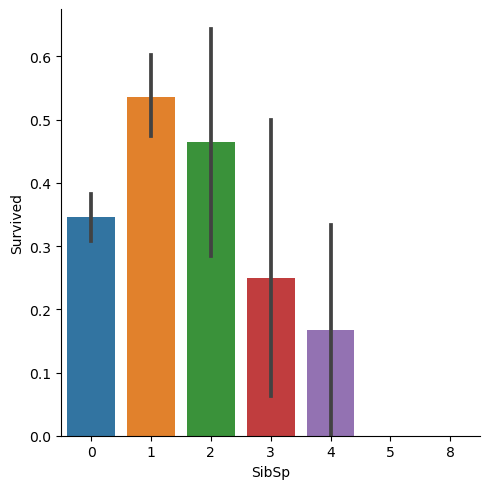

In [21]:
#bargraph of the number of siblings
bargraph_sibsp = sns.factorplot(x = 'SibSp',
                                y = 'Survived',
                                data = df, 
                               kind = 'bar')

In [22]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

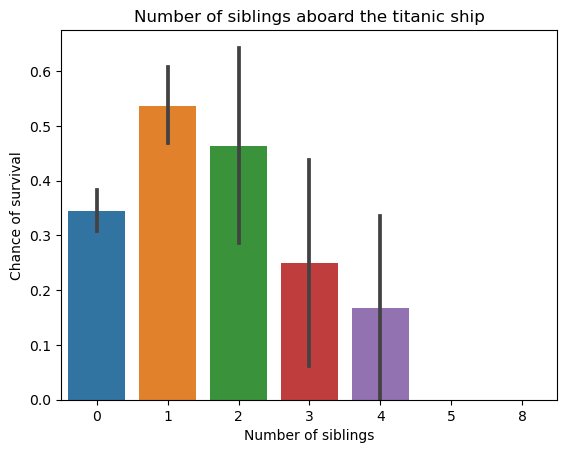

In [23]:
sns.barplot(x= df['SibSp'],  y=df['Survived'])
plt.xlabel('Number of siblings')
plt.ylabel('Chance of survival')
plt.title('Number of siblings aboard the titanic ship');

As the number of siblings increases, the chances of survival decreases

### Survival probability by  Age distribution

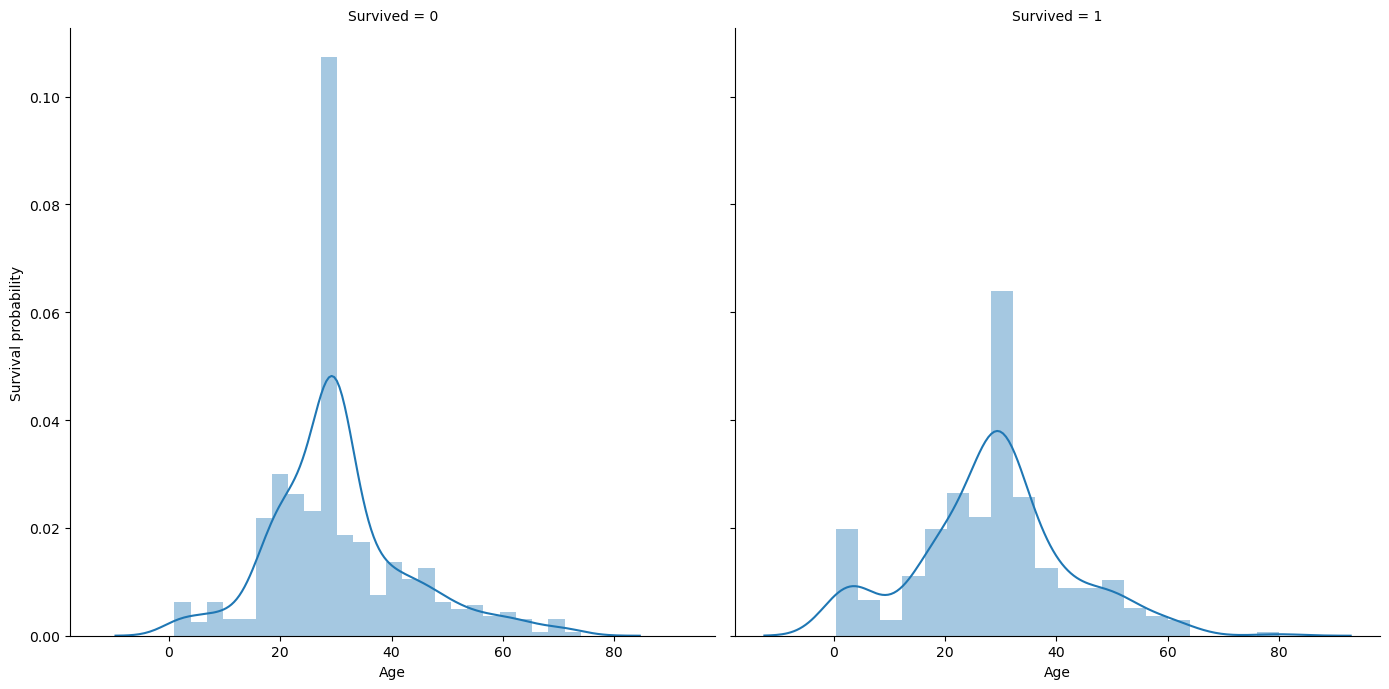

In [24]:
age_visual = sns.FacetGrid(df, col = 'Survived', size = 7)
age_visual = age_visual.map(sns.distplot, 'Age')
age_visual = age_visual.set_ylabels('Survival probability')

Age distribution seems to be a tailed distribution(gaussian distribution)

Hence, it can be deduced that those with lower ages between 0- 40 have higher chances of survival  




### Survival probability by Sex 

In [25]:
#average distribution of survivors by sex 
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


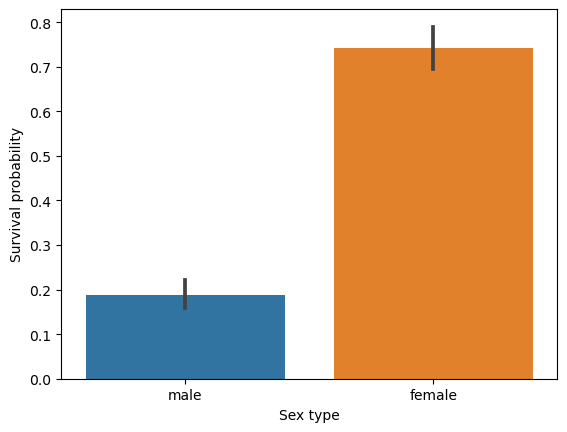

In [26]:
sns.barplot(x = df['Sex'], y = df['Survived']);
plt.xlabel('Sex type')
plt.ylabel('Survival probability');

Hence, females have the higher probability to survive

### Survival probability by PClass

In [27]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

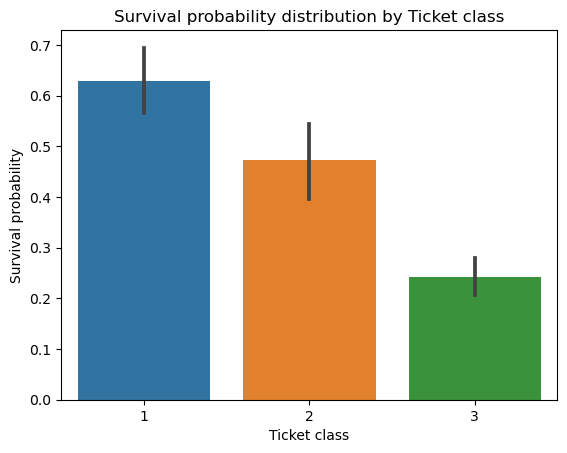

In [28]:
sns.barplot(x= 'Pclass', y = 'Survived', data = df)
plt.xlabel('Ticket class')
plt.ylabel('Survival probability')
plt.title('Survival probability distribution by Ticket class');

First class passengers have the highest chance of survival

### Survival probability of passengers class based on Sex 

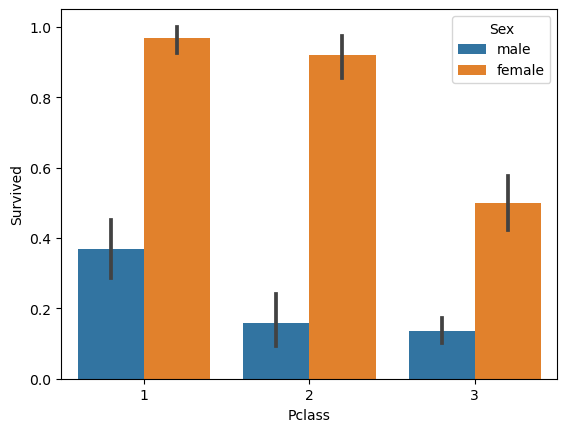

In [29]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df);

### Survival probability by Embarked

In [30]:
df['Embarked'].isnull().sum()

0

In [31]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

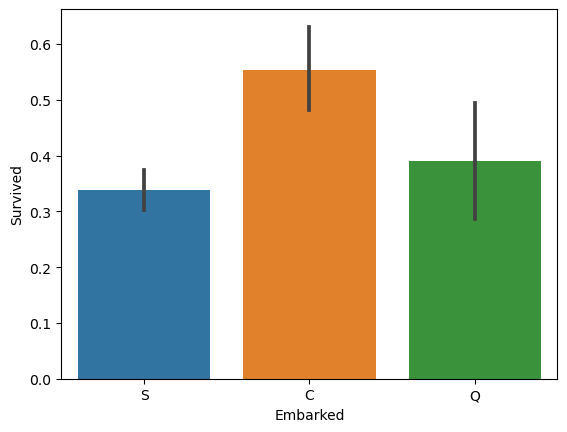

In [32]:
sns.barplot(x = 'Embarked', y = 'Survived', data= df);

From the above, it can be deduced that passengers coming from Chebourg(C) have more chance to survive

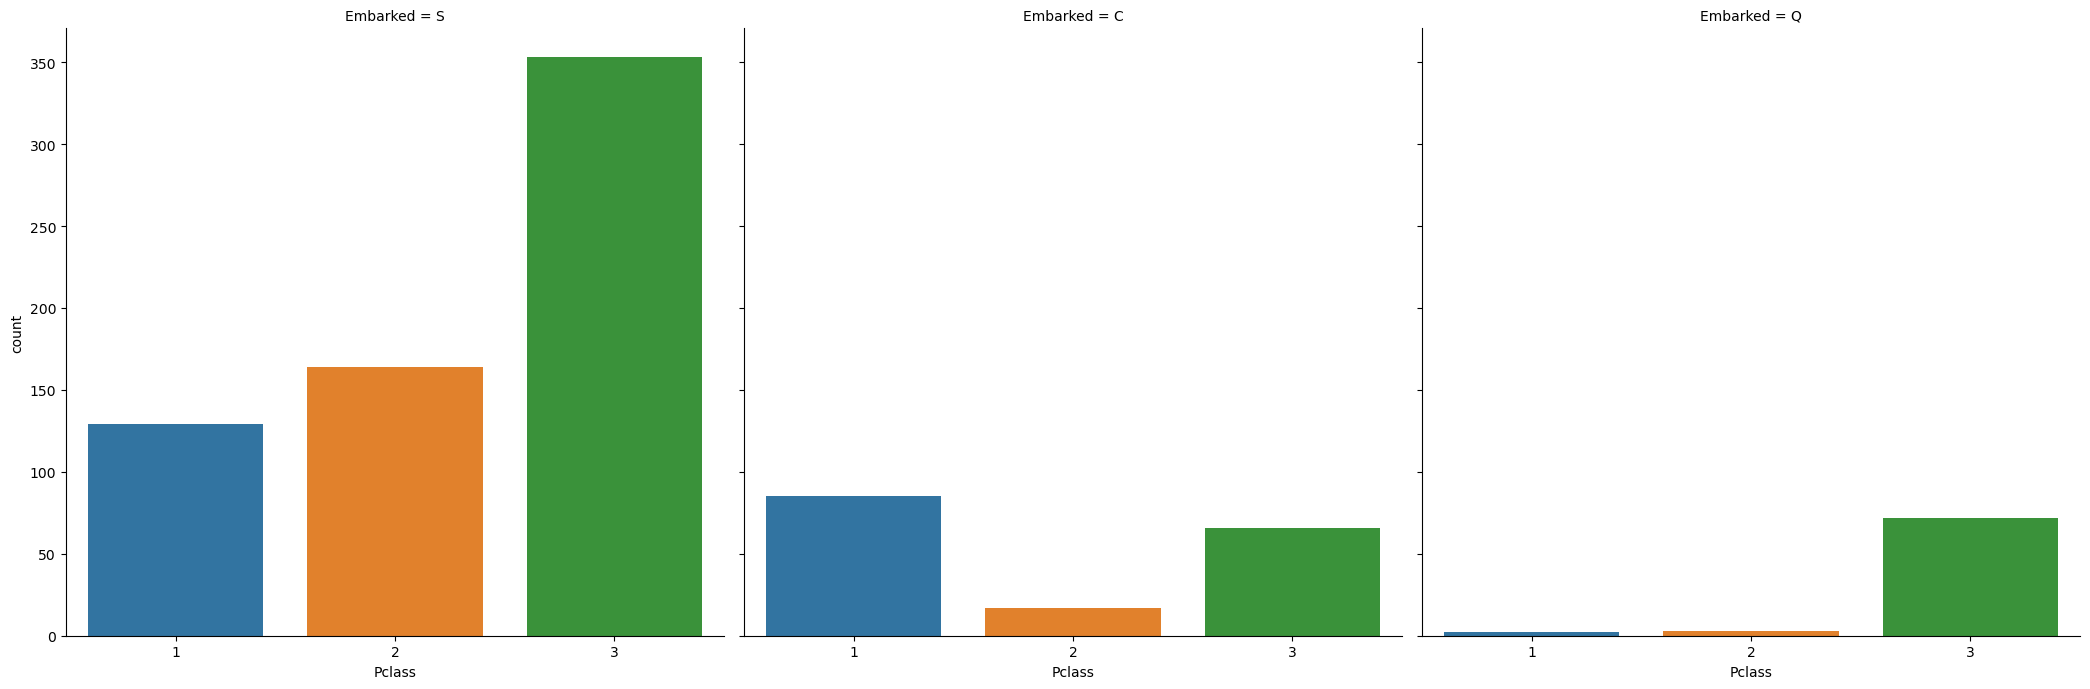

In [33]:
sns.factorplot('Pclass', 
               col = 'Embarked',
               data = df,
               size = 7, 
              kind = 'count');

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
# drop unuseful columns
col_to_drop = ['PassengerId', 'Cabin', 'Name', 'Ticket']
df.drop(col_to_drop, axis = 1, inplace = True)

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
# Encoding Sex categorical column
gender = {'male': 0, 'female' : 1}
df['Sex'] = df['Sex'].map(gender)

In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [40]:
# Encoding Embarked categorical column
port = {'S': 0, 'C' : 1, 'Q':2}
df['Embarked'] = df['Embarked'].map(port)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Data Modelling

In [42]:
X = df[['Age', 'Fare', 'Sex', 'Pclass']]
y = df['Survived']

In [43]:
X.head()

,Age,Fare,Sex,Pclass
0,22.0,7.2500,0,3
1,38.0,71.2833,1,1
2,26.0,7.9250,1,3
3,35.0,53.1000,1,1
4,35.0,8.0500,0,3


In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
#Importing libraries
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
#import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Feature Scaling

In [47]:
SC_X = StandardScaler()
X_train = SC_X.fit_transform(X_train)
Xtest = SC_X.transform(X_test)

 ## Classification

In [48]:
# Instantiating Classifier algorithms
logreg = LogisticRegression()
SVC_clf = SVC()
DT_clf = DecisionTreeClassifier()
KNN_clf = KNeighborsClassifier(5)
RF_clf = RandomForestClassifier(n_estimators = 1000, 
                                criterion = 'entropy', 
                                random_state = 0)

In [49]:
#fitting data
logreg.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)
DT_clf.fit(X_train, y_train)
KNN_clf.fit(X_train, y_train)
RF_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [50]:
#Predictions
logreg_pred = logreg.predict(X_test)
SVC_clf_pred = SVC_clf.predict(X_test)
DT_clf_pred = DT_clf.predict(X_test)
KNN_clf_pred = KNN_clf.predict(X_test)
RF_clf_pred = RF_clf.predict(X_test)

In [51]:
# Accuracy score for logistic regression
log_acc = accuracy_score(y_test, logreg_pred)
log_acc

0.6007462686567164

In [52]:
# Accuracy score for support vector classifier
svc_acc = accuracy_score(y_test, SVC_clf_pred)
svc_acc

0.4141791044776119

In [53]:
# Accuracy score for decision tree
DT_acc = accuracy_score(y_test, DT_clf_pred)
DT_acc

0.2126865671641791

In [54]:
# Accuracy score for knearest neigbor classifier
Knn_acc = accuracy_score(y_test, KNN_clf_pred)
Knn_acc

0.6791044776119403

In [55]:
# Accuracy score for random forest clf
Rf_acc = accuracy_score(y_test, RF_clf_pred)
Rf_acc

0.585820895522388

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, KNN_clf_pred))
 
print(classification_report(y_test, KNN_clf_pred))

[[98 59]
 [27 84]]
              precision    recall  f1-score   support

           0       0.78      0.62      0.70       157
           1       0.59      0.76      0.66       111

    accuracy                           0.68       268
   macro avg       0.69      0.69      0.68       268
weighted avg       0.70      0.68      0.68       268



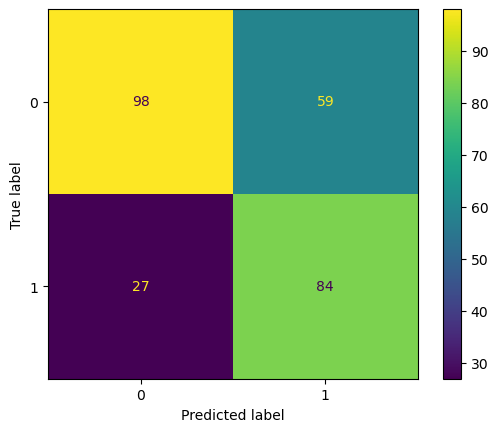

In [57]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(KNN_clf, X_test, y_test);



In [58]:
from sklearn.metrics import precision_score

# Compute the precision
precision = precision_score(y_test, KNN_clf_pred)

# Print the precision
print("Precision: {:.2f}".format(precision))


Precision: 0.59


In [60]:
from sklearn.metrics import recall_score

# Compute the recall
recall = recall_score(y_test, KNN_clf_pred)

# Print the recall
print("Recall: {:.2f}".format(recall))


Recall: 0.76


In [59]:
from sklearn.metrics import f1_score

# Compute the F1 score
f1 = f1_score(y_test, KNN_clf_pred)

# Print the F1 score
print("F1 score: {:.2f}".format(f1))


F1 score: 0.66


## Saving Trained model

In [108]:
# pickling the model
import pickle
pickle_out = open("Titanic_model.pkl", "wb")
pickle.dump(KNN_clf, pickle_out)
pickle_out.close()


In [120]:
#loading in the model to predict on the data
pickle_in = open('Titanic_model.pkl', 'rb')
load_model= pickle.load(pickle_in)

In [106]:
X.head()

,Age,Fare,Sex,Pclass
0,22.0,7.2500,0,3
1,38.0,71.2833,1,1
2,26.0,7.9250,1,3
3,35.0,53.1000,1,1
4,35.0,8.0500,0,3


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [118]:
import pickle
import numpy as np

def predict(Age, Fare, Sex, Pclass):
    # Load the model
    with open('Titanic_model.pkl', 'rb') as f:
        saved_model = pickle.load(f)
    
    # Create the input
    x = np.array([Age, Fare, Sex, Pclass]).reshape(1, -1)
    
#     # One-hot encode categorical variables
#     x = pd.get_dummies(x, columns=[2, 3])
    
    # Make the prediction
    y_pred = saved_model.predict(x)
    
    if (y_pred[0] == 0):
        return 'Not Survived'
    else:
        return 'Survived'
#     return y_pred[0]


In [119]:
predict([22.0, 7.2, 0, 4])

TypeError: predict() missing 3 required positional arguments: 'Fare', 'Sex', and 'Pclass'